In [1]:
import numpy as np
import pandas as pd

In [2]:
np.set_printoptions(precision=5, suppress=True)

In [3]:
df = pd.read_csv('../data/imobiliare_bucuresti.csv')

In [4]:
df

,Unnamed: 0,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price/Surface,Price,WebPage
0,1,2,56.00,0,1,0,2,1,1,639.29,35800,https://www.imobiliare.ro/vanzare-apartamente/...
1,2,2,57.00,0,1,0,2,0,1,628.07,35800,https://www.imobiliare.ro/vanzare-apartamente/...
2,3,2,67.00,0,1,0,2,1,1,591.04,39600,https://www.imobiliare.ro/vanzare-apartamente/...
3,4,1,48.00,0,1,0,2,1,1,620.83,29800,https://www.imobiliare.ro/vanzare-garsoniere/b...
4,5,3,89.60,0,0,1,3,1,1,1260.04,112900,https://www.imobiliare.ro/vanzare-apartamente/...
...,...,...,...,...,...,...,...,...,...,...,...,...
9892,9894,4,90.00,0,0,1,8,0,0,944.44,85000,https://www.imobiliare.ro/vanzare-apartamente/...
9893,9895,3,85.00,0,0,1,8,1,0,1588.22,134999,https://www.imobiliare.ro/vanzare-apartamente/...
9894,9896,2,48.00,0,0,1,4,0,0,1229.17,59000,https://www.imobiliare.ro/vanzare-apartamente/...
9895,9897,4,83.81,0,0,1,3,1,1,1312.49,110000,https://www.imobiliare.ro/vanzare-apartamente/...


In [5]:
y_sqmp = df["Price/Surface"]
y_price = df['Price']
X = df.iloc[:,1:9]


In [6]:
X

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
0,2,56.00,0,1,0,2,1,1
1,2,57.00,0,1,0,2,0,1
2,2,67.00,0,1,0,2,1,1
3,1,48.00,0,1,0,2,1,1
4,3,89.60,0,0,1,3,1,1
...,...,...,...,...,...,...,...,...
9892,4,90.00,0,0,1,8,0,0
9893,3,85.00,0,0,1,8,1,0
9894,2,48.00,0,0,1,4,0,0
9895,4,83.81,0,0,1,3,1,1


In [7]:
y_price

0        35800
1        35800
2        39600
3        29800
4       112900
         ...  
9892     85000
9893    134999
9894     59000
9895    110000
9896     61500
Name: Price, Length: 9897, dtype: int64

In [8]:
# further process X data maybe
# construct normal eq and determine model coefs (((XtX)^-1)Xt)y (y = x*w => w = y/x)
# validate results (how, when)
# f(X) = y = X[0]*w[0] + X[1]*w[1] + .... X[N]*w[N] +X[N+1]*w[N+1] | X[N+1] == 1

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Distribution of nr of rooms per apartment')

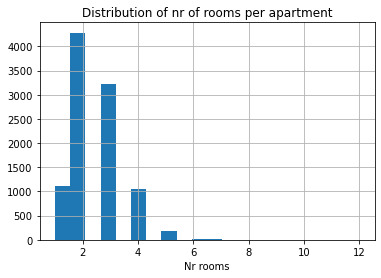

In [10]:
X['nr cam'].hist(bins=20)
plt.xlabel('Nr rooms')
plt.title('Distribution of nr of rooms per apartment')

Text(0.5, 1.0, 'Distribution of apartment surface')

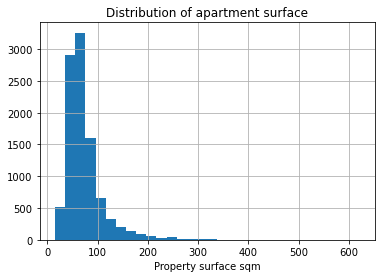

In [11]:
X['mp'].hist(bins=30)
plt.xlabel('Property surface sqm')
plt.title('Distribution of apartment surface')

(array([5637., 2571.,  748.,  335.,  191.,  127.,   71.,   36.,   50.,
          25.,    8.,    6.,   14.,    6.,    3.,   14.,    4.,   17.,
           2.,   10.,    2.,    2.,    2.,    2.,    1.,    3.,    0.,
           0.,    0.,    0.,    1.,    0.,    0.,    1.,    0.,    2.,
           0.,    2.,    2.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([  18000.,   95240.,  172480.,  249720.,  326960.,  404200.,
         481440.,  558680.,  635920.,  713160.,  790400.,  867640.,
         944880., 1022120., 1099360., 1176600., 1253840., 1331080.,
        1408320., 1485560., 1562800., 1640040., 1717280., 1794520.,
        1871760., 1949000., 2026240., 2103480., 2180720., 2257960.,
        2335200., 2412440., 2489680., 2566920., 2644160., 2721400.,
        2798640., 2875880., 2953120., 3030360., 3107600., 3184840.,
        3262080., 3339320., 3416560., 3493800., 3571040., 3648280.,
        3725520., 3802760., 3880000.]),
 <BarContainer o

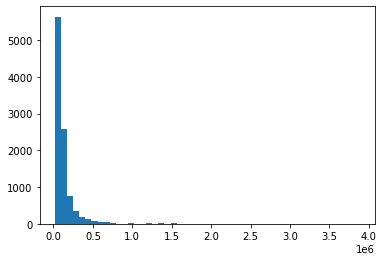

In [12]:
plt.hist(y_price.values, bins=50)

In [13]:
X.corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000


In [14]:
new_corr_features = ['nr cam', 'mp', 'parter', 'et1-2', 'et3+','etaj max', 'typ_decom', 'bloc nou', 'Price']

In [15]:
df_new = df[new_corr_features]

In [16]:
df_new.corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376,0.525333
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321,0.770386
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453,-0.020806
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789,-0.061217
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905,0.072650
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046,0.091064
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843,0.034928
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000,0.035021
Price,0.525333,0.770386,-0.020806,-0.061217,0.072650,0.091064,0.034928,0.035021,1.000000


In [17]:
X.mean()

nr cam        2.505709
mp           73.704865
parter        0.125695
et1-2         0.361827
et3+          0.512479
etaj max      3.336466
typ_decom     0.717591
bloc nou      0.593210
dtype: float64

In [18]:
X.min()

nr cam        1.0
mp           15.0
parter        0.0
et1-2         0.0
et3+          0.0
etaj max      0.0
typ_decom     0.0
bloc nou      0.0
dtype: float64

In [19]:
X.std()

nr cam        0.950467
mp           40.174869
parter        0.331522
et1-2         0.480553
et3+          0.499870
etaj max      2.818757
typ_decom     0.450194
bloc nou      0.491260
dtype: float64

In [20]:
X.max()

nr cam        12.0
mp           621.0
parter         1.0
et1-2          1.0
et3+           1.0
etaj max      18.0
typ_decom      1.0
bloc nou       1.0
dtype: float64

In [21]:
np_X = X.values

In [22]:
np_X

array([[ 2.  , 56.  ,  0.  , ...,  2.  ,  1.  ,  1.  ],
       [ 2.  , 57.  ,  0.  , ...,  2.  ,  0.  ,  1.  ],
       [ 2.  , 67.  ,  0.  , ...,  2.  ,  1.  ,  1.  ],
       ...,
       [ 2.  , 48.  ,  0.  , ...,  4.  ,  0.  ,  0.  ],
       [ 4.  , 83.81,  0.  , ...,  3.  ,  1.  ,  1.  ],
       [ 1.  , 35.  ,  0.  , ...,  4.  ,  1.  ,  1.  ]])

In [23]:
np_X.mean(axis=0)

array([ 2.50571, 73.70487,  0.12569,  0.36183,  0.51248,  3.33647,
        0.71759,  0.59321])

In [24]:
np_X_n = (np_X - np_X.mean(0)) / np_X.std(0)

In [25]:
np_X_n

array([[-0.53209, -0.44072, -0.37916, ..., -0.47416,  0.62734,  0.8281 ],
       [-0.53209, -0.41582, -0.37916, ..., -0.47416, -1.59404,  0.8281 ],
       [-0.53209, -0.1669 , -0.37916, ..., -0.47416,  0.62734,  0.8281 ],
       ...,
       [-0.53209, -0.63986, -0.37916, ...,  0.23541, -1.59404, -1.20759],
       [ 1.57224,  0.25154, -0.37916, ..., -0.11937,  0.62734,  0.8281 ],
       [-1.58426, -0.96346, -0.37916, ...,  0.23541,  0.62734,  0.8281 ]])

In [26]:
np_y = y_price.values
np_y_n = (np_y - np_y.min()) / (np_y.max() - np_y.min())
np_y_n

array([0.00461, 0.00461, 0.00559, ..., 0.01062, 0.02382, 0.01126])

In [27]:
np_y.min()


18000

In [28]:
np_y.max()

3880000

In [29]:
y_norm_sub = np_y.min()
y_norm_div = np_y.max() - np_y.min()

In [30]:
np_weights = np.linalg.pinv(np_X_n.T.dot(np_X_n)).dot(np_X_n.T).dot(np_y_n)

In [31]:
np_weights

array([-0.00868,  0.04232, -0.00003, -0.00004,  0.00006,  0.00202,
       -0.00217,  0.00101])

In [32]:
np_X_n

array([[-0.53209, -0.44072, -0.37916, ..., -0.47416,  0.62734,  0.8281 ],
       [-0.53209, -0.41582, -0.37916, ..., -0.47416, -1.59404,  0.8281 ],
       [-0.53209, -0.1669 , -0.37916, ..., -0.47416,  0.62734,  0.8281 ],
       ...,
       [-0.53209, -0.63986, -0.37916, ...,  0.23541, -1.59404, -1.20759],
       [ 1.57224,  0.25154, -0.37916, ..., -0.11937,  0.62734,  0.8281 ],
       [-1.58426, -0.96346, -0.37916, ...,  0.23541,  0.62734,  0.8281 ]])

In [33]:
np_y_preds = np_X_n.dot(np_weights)

In [34]:
np_y_preds

array([-0.01561, -0.00973, -0.00402, ..., -0.01965, -0.00367, -0.02699])

(array([7566., 1816.,  359.,  101.,   32.,   11.,    5.,    4.,    1.,
           2.]),
 array([-0.05244,  0.00608,  0.0646 ,  0.12311,  0.18163,  0.24015,
         0.29867,  0.35719,  0.41571,  0.47422,  0.53274]),
 <BarContainer object of 10 artists>)

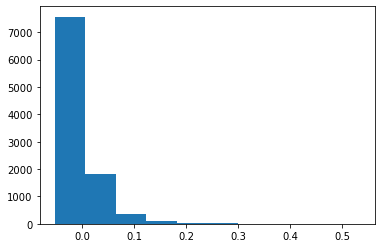

In [35]:
plt.hist(np_y_preds)

In [36]:
ones = np.ones(shape=(np_X_n.shape[0], 1))
ones

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [37]:
np_X_nb = np.concatenate((np_X_n, ones), axis=-1)
np_X_nb

array([[-0.53209, -0.44072, -0.37916, ...,  0.62734,  0.8281 ,  1.     ],
       [-0.53209, -0.41582, -0.37916, ..., -1.59404,  0.8281 ,  1.     ],
       [-0.53209, -0.1669 , -0.37916, ...,  0.62734,  0.8281 ,  1.     ],
       ...,
       [-0.53209, -0.63986, -0.37916, ..., -1.59404, -1.20759,  1.     ],
       [ 1.57224,  0.25154, -0.37916, ...,  0.62734,  0.8281 ,  1.     ],
       [-1.58426, -0.96346, -0.37916, ...,  0.62734,  0.8281 ,  1.     ]])

In [38]:
np_weights_b = np.linalg.pinv(np_X_nb.T.dot(np_X_nb)).dot(np_X_nb.T).dot(np_y_n)
np_weights_b

array([-0.00868,  0.04232, -0.00003, -0.00004,  0.00006,  0.00202,
       -0.00217,  0.00101,  0.03028])

In [39]:
np_y_preds2 = np_X_nb.dot(np_weights_b)
np_y_preds2

array([0.01466, 0.02054, 0.02625, ..., 0.01063, 0.02661, 0.00329])

(array([  21.,  628., 2177., 3021., 1719.,  772.,  433.,  269.,  199.,
         143.,  107.,   98.,   78.,   41.,   35.,   30.,   13.,   27.,
          15.,   16.,   11.,   13.,    4.,    2.,    2.,    4.,    2.,
           2.,    3.,    0.,    1.,    1.,    2.,    0.,    1.,    0.,
           0.,    1.,    1.,    2.,    0.,    0.,    0.,    1.,    0.,
           0.,    1.,    0.,    0.,    1.]),
 array([-0.02217, -0.01046,  0.00124,  0.01295,  0.02465,  0.03635,
         0.04806,  0.05976,  0.07146,  0.08317,  0.09487,  0.10657,
         0.11828,  0.12998,  0.14169,  0.15339,  0.16509,  0.1768 ,
         0.1885 ,  0.2002 ,  0.21191,  0.22361,  0.23532,  0.24702,
         0.25872,  0.27043,  0.28213,  0.29383,  0.30554,  0.31724,
         0.32894,  0.34065,  0.35235,  0.36406,  0.37576,  0.38746,
         0.39917,  0.41087,  0.42257,  0.43428,  0.44598,  0.45769,
         0.46939,  0.48109,  0.4928 ,  0.5045 ,  0.5162 ,  0.52791,
         0.53961,  0.55131,  0.56302]),
 <BarContainer o

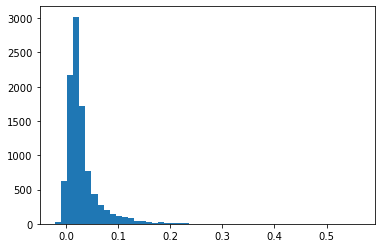

In [40]:
plt.hist(np_y_preds2, bins=50)

In [41]:
np_y_pred2_price = np_y_preds2 * y_norm_div + y_norm_sub
np_y_pred2_price

array([ 74630.72666,  97336.97484, 119387.11175, ...,  59035.52621,
       120766.01925,  30692.03852])

In [42]:
y_price

0        35800
1        35800
2        39600
3        29800
4       112900
         ...  
9892     85000
9893    134999
9894     59000
9895    110000
9896     61500
Name: Price, Length: 9897, dtype: int64

In [43]:
df_result = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred2_price.round(0),
    }
)
df_result.head(10)

,GOLD,PRED
0,35800,74631.0
1,35800,97337.0
2,39600,119387.0
3,29800,77334.0
4,112900,179577.0
5,37400,111250.0
6,39500,40195.0
7,2350000,1087563.0
8,332000,261328.0
9,39900,127124.0


In [44]:
df_result.tail(10)

,GOLD,PRED
9887,47000,43077.0
9888,34500,-28459.0
9889,56000,28301.0
9890,101000,139731.0
9891,79524,88871.0
9892,85000,170468.0
9893,134999,166740.0
9894,59000,59036.0
9895,110000,120766.0
9896,61500,30692.0


In [45]:
abs_err = np.abs(y_price - np_y_pred2_price)
abs_err

0       38830.726659
1       61536.974840
2       79787.111747
3       47533.793910
4       66677.318352
            ...     
9892    85468.449821
9893    31741.318014
9894       35.526206
9895    10766.019249
9896    30807.961481
Name: Price, Length: 9897, dtype: float64

In [46]:
proc_err = abs_err / y_price
proc_err = proc_err * 100

In [47]:
df_result = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred2_price.round(0),
        'ERR%' : proc_err.round(2)
    }
)
df_result.head(20)

,GOLD,PRED,ERR%
0,35800,74631.0,108.47
1,35800,97337.0,171.89
2,39600,119387.0,201.48
3,29800,77334.0,159.51
4,112900,179577.0,59.06
5,37400,111250.0,197.46
6,39500,40195.0,1.76
7,2350000,1087563.0,53.72
8,332000,261328.0,21.29
9,39900,127124.0,218.61


In [48]:
df_result.tail(20)

,GOLD,PRED,ERR%
9877,63000,59587.0,5.42
9878,32900,37952.0,15.36
9879,53490,49445.0,7.56
9880,79000,65299.0,17.34
9881,79900,110933.0,38.84
9882,149000,103315.0,30.66
9883,143000,154443.0,8.00
9884,55000,72155.0,31.19
9885,62860,67189.0,6.89
9886,27500,4096.0,85.11


In [49]:
proc_err.mean()

40.56805033787927

In [50]:
# split the np_X_nb data into train observation and test observations
# train with NEQ
# present results

In [51]:
def train_neq(inputs, gold):
    weights = np.linalg.pinv(inputs.T.dot(inputs)).dot(inputs.T).dot(gold)
    return weights

def evaluate(theta, inputs, gold, y_div, y_sub, name=""):
    _y_pred = inputs.dot(theta)
    _y_vals = _y_pred * y_div + y_sub
    
    _y_true = gold * y_div + y_sub
    
    res_err = np.abs(_y_true - _y_vals)
    prc_err = res_err / _y_true
    
    overall = prc_err.mean()
    df_result = pd.DataFrame(
        {
        'GOLD' : _y_true,
        'PRED' : _y_vals.round(0),
        'ERR%' : prc_err.round(2)
        }
    )
    print('Results for', name)
    print(df_result.head(20))
    print(df_result.tail(20))
    print("Overall error: {:.1f}%".format(overall * 100))
    return overall

In [52]:
from sklearn.model_selection import train_test_split
x_trn, x_tst, y_trn, y_tst = train_test_split(np_X_nb, np_y_n, test_size=0.2)

In [53]:
theta = train_neq(
    inputs=x_trn,
    gold=y_trn
)

In [54]:
theta

array([-0.00742,  0.03947, -0.     , -0.     ,  0.00001,  0.00167,
       -0.00206,  0.00065,  0.02978])

In [55]:
evaluate(
    theta=theta,
    inputs=x_trn,
    gold=y_trn,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    name='TRAIN',
)

Results for TRAIN
        GOLD      PRED  ERR%
0   505000.0  313919.0  0.38
1    64500.0   96531.0  0.50
2   123000.0  166527.0  0.35
3    50600.0   68981.0  0.36
4    80000.0   65604.0  0.18
5    54223.0   53673.0  0.01
6    79400.0   75202.0  0.05
7    51900.0   89592.0  0.73
8    50950.0   85010.0  0.67
9    73335.0  142081.0  0.94
10   26800.0    1978.0  0.93
11  125000.0  121189.0  0.03
12  105000.0  223442.0  1.13
13   57000.0   71020.0  0.25
14   92111.0   81403.0  0.12
15   90234.0   83606.0  0.07
16   37900.0   41574.0  0.10
17   63000.0   61392.0  0.03
18   81000.0   85999.0  0.06
19   90000.0   82849.0  0.08
           GOLD      PRED  ERR%
7897    70350.0   79712.0  0.13
7898    37900.0   36928.0  0.03
7899   150000.0   75459.0  0.50
7900   413295.0  855846.0  1.07
7901   299900.0  313726.0  0.05
7902   231000.0  522342.0  1.26
7903    33900.0   -2727.0  1.08
7904    82000.0  105435.0  0.29
7905    57000.0   71020.0  0.25
7906   119000.0  150176.0  0.26
7907   140000.0  1222

0.38475364437801385

In [57]:
evaluate(
    theta=theta,
    inputs=x_tst,
    gold=y_tst,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    name='TEST',
)

Results for TEST
         GOLD      PRED  ERR%
0     56600.0   76569.0  0.35
1     86900.0  125244.0  0.44
2     53240.0  104620.0  0.97
3    400000.0  269960.0  0.33
4    230000.0  162081.0  0.30
5     55000.0   80048.0  0.46
6    108000.0   89794.0  0.17
7     69900.0  107113.0  0.53
8     74000.0   62580.0  0.15
9    155000.0  174446.0  0.13
10   115000.0  173719.0  0.51
11    95000.0  209566.0  1.21
12    81000.0  102023.0  0.26
13   435000.0  288280.0  0.34
14    79000.0   60812.0  0.23
15    75500.0   38626.0  0.49
16    85240.0   89133.0  0.05
17  1349888.0  681112.0  0.50
18    65000.0   31177.0  0.52
19    18000.0  -33125.0  2.84
          GOLD      PRED  ERR%
1960   47000.0   50351.0  0.07
1961   41500.0   24578.0  0.41
1962   48000.0   43212.0  0.10
1963   42000.0   49815.0  0.19
1964   55650.0   37123.0  0.33
1965   49500.0   60748.0  0.23
1966  350000.0  173464.0  0.50
1967  148000.0  140616.0  0.05
1968  220000.0  248694.0  0.13
1969   51000.0   52300.0  0.03
1970   78900

0.38318735596074843

In [58]:
import torch as th

class SimpleLinerRealEstateModel(th.nn.Module):
    def __init__(self, n_feats, n_hid1=32):
        super().__init__()
        self.hidden1 = th.nn.Linear(n_feats, n_hid1)
        self.act1 = th.nn.ReLU()
        self.readout = th.nn.Linear(n_hid1, 1)
        return
    
    def forward(self, inputs):
        th_x = self.hidden1(inputs)
        th_x = self.act1(th_x)
        th_out = self.readout(th_x)
        return th_out


In [59]:
model = SimpleLinerRealEstateModel(8, 256)
model

SimpleLinerRealEstateModel(
  (hidden1): Linear(in_features=8, out_features=256, bias=True)
  (act1): ReLU()
  (readout): Linear(in_features=256, out_features=1, bias=True)
)

In [60]:
# construct simple torch dataset
# for each individual batch within dataset
# apply gradient descent
# test the model (mayb validate before within training process)

# then do the same in tensorflow.keras


In [61]:
x_trn.shape

(7917, 9)

In [62]:
x_trn

array([[ 1.57224,  1.40132, -0.37916, ...,  0.62734,  0.8281 ,  1.     ],
       [-0.53209, -0.26647, -0.37916, ...,  0.62734, -1.20759,  1.     ],
       [ 0.52008,  0.40563, -0.37916, ...,  0.62734, -1.20759,  1.     ],
       ...,
       [-0.53209, -0.18731, -0.37916, ..., -1.59404, -1.20759,  1.     ],
       [ 2.62441,  4.3924 , -0.37916, ...,  0.62734,  0.8281 ,  1.     ],
       [ 0.52008,  0.08825, -0.37916, ...,  0.62734,  0.8281 ,  1.     ]])

In [63]:
x_tst.shape

(1980, 9)

In [64]:
x_dev = x_tst[:1000,:]
x_test = x_tst[1000:,:]

In [65]:
th_x_trn = th.tensor(x_trn[:,:-1], dtype=th.float32)
th_x_dev = th.tensor(x_dev[:,:-1], dtype=th.float32)
th_x_test = th.tensor(x_test[:,:-1], dtype=th.float32)

In [66]:
th_x_test

tensor([[ 0.5201,  0.0484, -0.3792,  ..., -0.1194,  0.6273,  0.8281],
        [-0.5321, -0.2167, -0.3792,  ...,  0.5902,  0.6273,  0.8281],
        [-1.5843, -0.4407, -0.3792,  ...,  2.0093,  0.6273,  0.8281],
        ...,
        [-1.5843, -1.0381, -0.3792,  ...,  0.5902, -1.5940, -1.2076],
        [ 0.5201, -0.2665, -0.3792,  ...,  0.2354,  0.6273,  0.8281],
        [-0.5321, -0.6647,  2.6374,  ..., -1.1837, -1.5940, -1.2076]])

In [67]:
y_tst

array([0.00999, 0.01784, 0.00912, ..., 0.00772, 0.02043, 0.01243])

In [68]:
y_dev = y_tst[:1000].reshape(-1,1)
y_test = y_tst[1000:].reshape(-1,1)
y_trn = y_trn.reshape(-1,1)
y_trn[:10]

array([[0.1261 ],
       [0.01204],
       [0.02719],
       [0.00844],
       [0.01605],
       [0.00938],
       [0.0159 ],
       [0.00878],
       [0.00853],
       [0.01433]])

In [69]:
th_y_trn = th.tensor(y_trn, dtype=th.float32)
th_y_dev = th.tensor(y_dev, dtype=th.float32)
th_y_test = th.tensor(y_test, dtype=th.float32)
th_y_trn

tensor([[0.1261],
        [0.0120],
        [0.0272],
        ...,
        [0.0211],
        [0.3811],
        [0.0187]])

In [70]:
th_y_test.shape

torch.Size([980, 1])

In [71]:
th_x_trn.shape

torch.Size([7917, 8])

In [72]:
BATCH_SIZE = 128
TOTAL_NR_EPOCHS = 100

In [73]:
th_ds = th.utils.data.TensorDataset(th_x_trn, th_y_trn)
th_dl = th.utils.data.DataLoader(th_ds, batch_size=BATCH_SIZE)

In [74]:
for th_x_batch, th_y_batch in th_dl:
    break
th_x_batch

tensor([[ 1.5722,  1.4013, -0.3792,  ...,  2.3641,  0.6273,  0.8281],
        [-0.5321, -0.2665, -0.3792,  ..., -0.4742,  0.6273, -1.2076],
        [ 0.5201,  0.4056, -0.3792,  ..., -0.8289,  0.6273, -1.2076],
        ...,
        [-0.5321, -0.7643, -0.3792,  ..., -0.4742,  0.6273,  0.8281],
        [ 0.5201, -0.2665,  2.6374,  ..., -1.1837,  0.6273,  0.8281],
        [-0.5321, -0.5652, -0.3792,  ..., -0.1194,  0.6273,  0.8281]])

In [75]:
print(th_x_batch.shape)
print(th_y_batch.shape)

torch.Size([128, 8])
torch.Size([128, 1])


In [104]:
def th_evaluate(m, th_inputs, gold, y_div, y_sub, name="", verbose=False):
    m.eval()
    with th.no_grad():
        _y_pred = m(th_inputs).numpy()
    _y_vals = _y_pred * y_div + y_sub
    
    _y_true = gold * y_div + y_sub
    
    res_err = np.abs(_y_true - _y_vals)
    prc_err = res_err / _y_true
    
    overall = prc_err.mean()
    if verbose:
        df_result = pd.DataFrame(
            {
            'GOLD' : _y_true.ravel(),
            'PRED' : _y_vals.ravel().round(0),
            'ERR%' : prc_err.ravel().round(2)
            }
        )
        print('Results for', name)
        print(df_result.head(20))
        print(df_result.tail(20))    
    m.train()
    return overall

In [77]:
loss_func = th.nn.MSELoss()
# optimizer: weights = weights - alpha * grads # alpha << 1
opt = th.optim.Adam(model.parameters(), lr=5e-5)
opt

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 5e-05
    weight_decay: 0
)

In [78]:
best_dev_err = 100
wait_time = 0
max_nr_of_succesive_fails = 2
for epoch in range(TOTAL_NR_EPOCHS):
    for th_x_batch, th_y_batch in th_dl:
        # compute current inferred values with forward prop
        th_y_hat = model(th_x_batch)
        # compute loss (compare results with actual truth)
        th_loss = loss_func(input=th_y_hat, target=th_y_batch) #((th_y_hat - th_y_batch)**2).mean()
        # nullfy the gradients
        opt.zero_grad()
        # compute loss 1st derv wrt all model weights (grads)
        th_loss.backward()
        # apply gradients to weights with a hopefully smart approach
        opt.step()
    # now we evaluate on TRAIN and DEV to see how good we are
    th_evaluate(
        m=model,
        th_inputs=th_x_trn,
        gold=y_trn,
        y_div=y_norm_div,
        y_sub=y_norm_sub,
        verbose=False,
        name='TRAIN @ Epoch {}'.format(epoch)
    )
    dev_err = th_evaluate(
        m=model,
        th_inputs=th_x_dev,
        gold=y_dev,
        y_div=y_norm_div,
        y_sub=y_norm_sub,
        verbose=False,
        name='DEV @ Epoch {}'.format(epoch)
    )
    if best_dev_err > dev_err:
        best_dev_err = dev_err
        wait_time = 0
        print("BEST MODEL @ Epoch {}".format(epoch))
    else:
        wait_time += 1
        if wait_time > max_nr_of_succesive_fails:
            print("STOP TRAINING !")
            break

# finally we evaluate on TEST
th_evaluate(
    m=model,
    th_inputs=th_x_test,
    gold=y_test,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    verbose=True,
    name='Final TEST'
)


Overall error for TRAIN @ Epoch 0: 391.4%
Overall error for DEV @ Epoch 0: 396.4%
BEST MODEL @ Epoch 0
Overall error for TRAIN @ Epoch 1: 279.8%
Overall error for DEV @ Epoch 1: 272.6%
BEST MODEL @ Epoch 1
Overall error for TRAIN @ Epoch 2: 231.9%
Overall error for DEV @ Epoch 2: 221.4%
BEST MODEL @ Epoch 2
Overall error for TRAIN @ Epoch 3: 198.7%
Overall error for DEV @ Epoch 3: 189.0%
BEST MODEL @ Epoch 3
Overall error for TRAIN @ Epoch 4: 173.5%
Overall error for DEV @ Epoch 4: 164.5%
BEST MODEL @ Epoch 4
Overall error for TRAIN @ Epoch 5: 153.6%
Overall error for DEV @ Epoch 5: 145.1%
BEST MODEL @ Epoch 5
Overall error for TRAIN @ Epoch 6: 137.1%
Overall error for DEV @ Epoch 6: 129.1%
BEST MODEL @ Epoch 6
Overall error for TRAIN @ Epoch 7: 123.4%
Overall error for DEV @ Epoch 7: 116.0%
BEST MODEL @ Epoch 7
Overall error for TRAIN @ Epoch 8: 111.8%
Overall error for DEV @ Epoch 8: 105.5%
BEST MODEL @ Epoch 8
Overall error for TRAIN @ Epoch 9: 102.4%
Overall error for DEV @ Epoch 9

Overall error for TRAIN @ Epoch 80: 34.0%
Overall error for DEV @ Epoch 80: 33.5%
BEST MODEL @ Epoch 80
Overall error for TRAIN @ Epoch 81: 33.9%
Overall error for DEV @ Epoch 81: 33.4%
BEST MODEL @ Epoch 81
Overall error for TRAIN @ Epoch 82: 33.8%
Overall error for DEV @ Epoch 82: 33.3%
BEST MODEL @ Epoch 82
Overall error for TRAIN @ Epoch 83: 33.8%
Overall error for DEV @ Epoch 83: 33.2%
BEST MODEL @ Epoch 83
Overall error for TRAIN @ Epoch 84: 33.7%
Overall error for DEV @ Epoch 84: 33.1%
BEST MODEL @ Epoch 84
Overall error for TRAIN @ Epoch 85: 33.6%
Overall error for DEV @ Epoch 85: 33.0%
BEST MODEL @ Epoch 85
Overall error for TRAIN @ Epoch 86: 33.5%
Overall error for DEV @ Epoch 86: 33.0%
BEST MODEL @ Epoch 86
Overall error for TRAIN @ Epoch 87: 33.5%
Overall error for DEV @ Epoch 87: 32.9%
BEST MODEL @ Epoch 87
Overall error for TRAIN @ Epoch 88: 33.4%
Overall error for DEV @ Epoch 88: 32.8%
BEST MODEL @ Epoch 88
Overall error for TRAIN @ Epoch 89: 33.4%
Overall error for DEV 

0.34498163583840563

In [113]:
th_loss

tensor(0.0265, grad_fn=<MseLossBackward>)

In [114]:
th_loss2


tensor(0.0265, grad_fn=<MeanBackward0>)

In [101]:
th_p = next(model.parameters())

In [102]:
th_p

Parameter containing:
tensor([[-0.3237, -0.0135,  0.0039,  0.1976, -0.0710,  0.1697, -0.0625,  0.1297],
        [-0.3445,  0.1659, -0.0006,  0.1632, -0.0245, -0.2213, -0.2582,  0.3335],
        [ 0.2090, -0.0180,  0.3157, -0.0739, -0.1897,  0.2394,  0.2573, -0.3424],
        [ 0.2675, -0.3024, -0.2920,  0.0688, -0.1947,  0.1008,  0.0222, -0.2238],
        [-0.2727, -0.0212, -0.0715, -0.0897,  0.1732, -0.1554, -0.3270, -0.2729],
        [ 0.3115,  0.1699, -0.2831, -0.2362,  0.0647,  0.0031, -0.2171, -0.2635],
        [ 0.3292, -0.0841,  0.1267, -0.1887,  0.2347,  0.0825, -0.2841, -0.3204],
        [-0.2087,  0.3115,  0.1408, -0.1852, -0.2997, -0.1595, -0.2179, -0.2679],
        [-0.2799, -0.1589,  0.0369,  0.0104, -0.1110,  0.0779,  0.2486, -0.1360],
        [ 0.2119, -0.0055,  0.1011, -0.0499,  0.1193,  0.2478, -0.0503,  0.1248],
        [ 0.0968, -0.3024, -0.3401,  0.1819,  0.2067,  0.0256,  0.0419,  0.3459],
        [ 0.0976,  0.0354, -0.1622,  0.3426,  0.2328, -0.2502, -0.2256,  0.3

In [117]:
th_p.grad

tensor([[-4.9262e-03, -6.3331e-03, -1.6803e-02,  3.1191e-02, -1.8842e-02,
         -9.0149e-03,  9.4221e-03,  5.1002e-03],
        [-8.8535e-02, -6.1137e-02,  3.3573e-02, -1.0230e-01,  7.6081e-02,
          8.6771e-02, -3.2369e-03, -8.1327e-02],
        [ 3.0522e-02,  1.0876e-02,  6.7817e-02, -3.8839e-03, -4.1244e-02,
         -5.2713e-02,  9.2966e-03, -3.1257e-02],
        [ 3.1581e-03,  4.7247e-04, -1.1438e-02,  3.0346e-02, -2.1588e-02,
         -1.5415e-02, -2.1142e-03,  4.4103e-03],
        [ 2.0384e-03, -4.8277e-04, -1.1842e-03,  6.9161e-04,  1.2053e-04,
         -1.7344e-03, -3.6407e-03, -9.4507e-03],
        [-7.4779e-02, -5.7259e-02, -1.0377e-02,  4.9481e-03,  2.1254e-03,
          2.6047e-02,  4.5602e-02,  1.2375e-02],
        [ 1.2540e-01,  9.3933e-02,  4.0119e-02, -3.9293e-02,  1.1167e-02,
         -3.5118e-02, -3.6726e-02, -3.6721e-02],
        [-5.5664e-03, -3.3949e-03, -3.9546e-03, -1.6501e-03,  4.2091e-03,
          5.1056e-03,  2.1016e-03,  4.9515e-03],
        [ 1.9228

In [118]:
opt.zero_grad()

In [119]:
th_p.grad

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0

In [91]:
th_evaluate(
    m=model,
    th_inputs=th_x_test,
    gold=y_test,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    verbose=True,
    name='Final TEST'
)

Results for Final TEST
        GOLD      PRED  ERR%
0   121685.0  107754.0  0.11
1    48000.0   91540.0  0.91
2    82000.0  110223.0  0.34
3   122200.0   70852.0  0.42
4   158000.0  367192.0  1.32
5    53000.0  117250.0  1.21
6   280000.0  310171.0  0.11
7   115000.0   53978.0  0.53
8    77500.0   94561.0  0.22
9   241000.0  109223.0  0.55
10  106000.0  120395.0  0.14
11  399000.0  628181.0  0.57
12   49450.0   54561.0  0.10
13  230000.0  116623.0  0.49
14   71800.0   84033.0  0.17
15   87000.0   83368.0  0.04
16   94038.0  107854.0  0.15
17  153000.0  159056.0  0.04
18  240000.0  229514.0  0.04
19   72500.0   60619.0  0.16
         GOLD      PRED  ERR%
960   47000.0   72439.0  0.54
961   41500.0   81677.0  0.97
962   48000.0   70054.0  0.46
963   42000.0   35058.0  0.17
964   55650.0   47721.0  0.14
965   49500.0  116774.0  1.36
966  350000.0  137191.0  0.61
967  148000.0  122820.0  0.17
968  220000.0  249075.0  0.13
969   51000.0   60187.0  0.18
970   78900.0  159879.0  1.03
971  180

0.34498163583840563

In [93]:
import torch as th

class BetterLinerRealEstateModel(th.nn.Module):
    def __init__(self, n_input_feats, layers=[32], activation=th.nn.ReLU):
        super().__init__()
        self.layers = th.nn.ModuleList()
        n_prev = n_input_feats
        for layer_size in layers:
            hid = th.nn.Linear(n_prev, layer_size)
            act = activation()
            self.layers.append(hid)
            self.layers.append(act)
            n_prev = layer_size
        
        self.readout = th.nn.Linear(n_prev, 1)
        return
    
    def forward(self, inputs):
        th_x = inputs
        for layer in self.layers:
            th_x = layer(th_x)
        th_out = self.readout(th_x)
        return th_out

test_model = BetterLinerRealEstateModel(8, [100, 10], activation=th.nn.Sigmoid)
test_model

BetterLinerRealEstateModel(
  (layers): ModuleList(
    (0): Linear(in_features=8, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=10, bias=True)
    (3): Sigmoid()
  )
  (readout): Linear(in_features=10, out_features=1, bias=True)
)

In [97]:
def get_model_and_optimizer(layers, activation, opt_class, lr):
    model = BetterLinerRealEstateModel(8, layers, activation)
    opt = opt_class(model.parameters(), lr=lr)
    return model, opt

test_model, test_opt = get_model_and_optimizer([200, 50], th.nn.ELU, th.optim.SGD, 0.001)

In [98]:
test_model

BetterLinerRealEstateModel(
  (layers): ModuleList(
    (0): Linear(in_features=8, out_features=200, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=200, out_features=50, bias=True)
    (3): ELU(alpha=1.0)
  )
  (readout): Linear(in_features=50, out_features=1, bias=True)
)

In [99]:
test_opt

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [102]:
dct_grid_space = {
    'layers' : [
        [32],
        [256],
        [64, 32],
        [64, 32, 16],
    ],
    'activation' : [
        th.nn.ReLU,
        th.nn.SELU,
    ],
    'opt_class' : [
        th.optim.SGD,
        th.optim.Adam
    ],
    'lr' : [
        0.001,
        0.0001
    ]
}

In [103]:
loss_func = th.nn.MSELoss()
dct_grid_space

{'layers': [[32], [256], [64, 32], [64, 32, 16]],
 'activation': [torch.nn.modules.activation.ReLU,
  torch.nn.modules.activation.SELU],
 'opt_class': [torch.optim.sgd.SGD, torch.optim.adam.Adam],
 'lr': [0.001, 0.0001]}

In [116]:
def train_model(model, opt, max_epochs=TOTAL_NR_EPOCHS):
    best_dev_err = 100
    wait_time = 0
    max_nr_of_succesive_fails = 2
    for epoch in range(max_epochs):
        for th_x_batch, th_y_batch in th_dl:
            # compute current inferred values with forward prop
            th_y_hat = model(th_x_batch)
            # compute loss (compare results with actual truth)
            th_loss = loss_func(input=th_y_hat, target=th_y_batch) #((th_y_hat - th_y_batch)**2).mean()
            # nullfy the gradients
            opt.zero_grad()
            # compute loss 1st derv wrt all model weights (grads)
            th_loss.backward()
            # apply gradients to weights with a hopefully smart approach
            opt.step()
        # now we evaluate on TRAIN and DEV to see how good we are
        dev_err = th_evaluate(
            m=model,
            th_inputs=th_x_dev,
            gold=y_dev,
            y_div=y_norm_div,
            y_sub=y_norm_sub,
            verbose=False,
            name='DEV @ Epoch {}'.format(epoch)
        )
        if best_dev_err > dev_err:
            best_dev_err = dev_err
            wait_time = 0
            print("\rBEST MODEL @ Epoch {}\r".format(epoch), end='', flush=True)
        else:
            wait_time += 1
            if wait_time > max_nr_of_succesive_fails:
                print("\nSTOP TRAINING !")
                break
    return model



In [106]:
dct_res = {
    'MODEL' : [],
    'DEV' : [],
    'TEST' : [],
}

In [109]:
grid_params = []
grid_values = []
for k in dct_grid_space:
    grid_params.append(k)
    grid_values.append(dct_grid_space[k])
import itertools
grid_combs = list(itertools.product(*grid_values))


In [110]:
grid_params

['layers', 'activation', 'opt_class', 'lr']

In [111]:
grid_combs

[([32], torch.nn.modules.activation.ReLU, torch.optim.sgd.SGD, 0.001),
 ([32], torch.nn.modules.activation.ReLU, torch.optim.sgd.SGD, 0.0001),
 ([32], torch.nn.modules.activation.ReLU, torch.optim.adam.Adam, 0.001),
 ([32], torch.nn.modules.activation.ReLU, torch.optim.adam.Adam, 0.0001),
 ([32], torch.nn.modules.activation.SELU, torch.optim.sgd.SGD, 0.001),
 ([32], torch.nn.modules.activation.SELU, torch.optim.sgd.SGD, 0.0001),
 ([32], torch.nn.modules.activation.SELU, torch.optim.adam.Adam, 0.001),
 ([32], torch.nn.modules.activation.SELU, torch.optim.adam.Adam, 0.0001),
 ([256], torch.nn.modules.activation.ReLU, torch.optim.sgd.SGD, 0.001),
 ([256], torch.nn.modules.activation.ReLU, torch.optim.sgd.SGD, 0.0001),
 ([256], torch.nn.modules.activation.ReLU, torch.optim.adam.Adam, 0.001),
 ([256], torch.nn.modules.activation.ReLU, torch.optim.adam.Adam, 0.0001),
 ([256], torch.nn.modules.activation.SELU, torch.optim.sgd.SGD, 0.001),
 ([256], torch.nn.modules.activation.SELU, torch.optim

In [112]:
len(grid_combs)

32

In [114]:
for grid_iter in range(len(grid_combs)):
    dct_curr_params = {k:v for k,v in zip(grid_params, grid_combs[grid_iter])}
    break
dct_curr_params

{'layers': [32],
 'activation': torch.nn.modules.activation.ReLU,
 'opt_class': torch.optim.sgd.SGD,
 'lr': 0.001}

In [124]:
_c = th.nn.ReLU
_c.__name__

'ReLU'

In [126]:
models = []
dct_res = {
    'MODEL' : [],
    'DEV' : [],
    'TEST' : [],
}

# prepare grid search
grid_params = []
grid_values = []
for k in dct_grid_space:
    grid_params.append(k)
    grid_values.append(dct_grid_space[k])
import itertools
grid_combs = list(itertools.product(*grid_values))

for grid_iter in range(len(grid_combs)):
    dct_curr_params = {k:v for k,v in zip(grid_params, grid_combs[grid_iter])}
    break

# run grid search
for grid_iter in range(len(grid_combs)):
    dct_curr_params = {k:v for k,v in zip(grid_params, grid_combs[grid_iter])}
    print("Running grid search space model #{}/{}".format(grid_iter+1,len(grid_combs)))
    model, opt = get_model_and_optimizer(**dct_curr_params)
    model = train_model(model, opt)
    models.append(model)
    dev_err = th_evaluate(
        m=model,
        th_inputs=th_x_dev,
        gold=y_dev,
        y_div=y_norm_div,
        y_sub=y_norm_sub,
        verbose=False,
        name='Final DEV'
    )
    test_err = th_evaluate(
        m=model,
        th_inputs=th_x_test,
        gold=y_test,
        y_div=y_norm_div,
        y_sub=y_norm_sub,
        verbose=False,
        name='Final TEST'
    )
    dct_res['MODEL'].append('Model #' + str(grid_iter + 1))
    dct_res['DEV'].append(dev_err)
    dct_res['TEST'].append(test_err)
    for k,v in dct_curr_params.items():
        if k not in dct_res:
            dct_res[k] = []
        if not isinstance(v, (list, int, float)):
            dct_res[k].append(v.__name__)
        else:
            dct_res[k].append(v)
    print('Result so far:\n{}'.format(pd.DataFrame(dct_res).sort_values('TEST')))


Running grid search space model #1/32
Result so far:poch 99
      MODEL       DEV      TEST layers activation opt_class     lr
0  Model #1  1.275256  1.435682   [32]       ReLU       SGD  0.001
Running grid search space model #2/32
Result so far:poch 99
      MODEL       DEV      TEST layers activation opt_class      lr
0  Model #1  1.275256  1.435682   [32]       ReLU       SGD  0.0010
1  Model #2  5.134489  5.073544   [32]       ReLU       SGD  0.0001
Running grid search space model #3/32
BEST MODEL @ Epoch 32
STOP TRAINING !
Result so far:
      MODEL       DEV      TEST layers activation opt_class      lr
2  Model #3  0.383737  0.416761   [32]       ReLU      Adam  0.0010
0  Model #1  1.275256  1.435682   [32]       ReLU       SGD  0.0010
1  Model #2  5.134489  5.073544   [32]       ReLU       SGD  0.0001
Running grid search space model #4/32
Result so far:poch 99
      MODEL       DEV      TEST layers activation opt_class      lr
3  Model #4  0.415751  0.415868   [32]       ReLU  

BEST MODEL @ Epoch 9
STOP TRAINING !
Result so far:
        MODEL       DEV      TEST layers activation opt_class      lr
11  Model #12  0.347785  0.348903  [256]       ReLU      Adam  0.0001
3    Model #4  0.415751  0.415868   [32]       ReLU      Adam  0.0001
2    Model #3  0.383737  0.416761   [32]       ReLU      Adam  0.0010
6    Model #7  0.422050  0.420657   [32]       SELU      Adam  0.0010
10  Model #11  0.447222  0.457512  [256]       ReLU      Adam  0.0010
7    Model #8  0.469736  0.490195   [32]       SELU      Adam  0.0001
14  Model #15  0.586860  0.609991  [256]       SELU      Adam  0.0010
12  Model #13  0.719720  0.721990  [256]       SELU       SGD  0.0010
8    Model #9  0.867551  0.896963  [256]       ReLU       SGD  0.0010
4    Model #5  0.958190  0.926192   [32]       SELU       SGD  0.0010
13  Model #14  1.037783  1.041271  [256]       SELU       SGD  0.0001
0    Model #1  1.275256  1.435682   [32]       ReLU       SGD  0.0010
9   Model #10  1.398924  1.448937  [25

Result so far:poch 99
        MODEL       DEV      TEST    layers activation opt_class      lr
19  Model #20  0.295773  0.301716  [64, 32]       ReLU      Adam  0.0001
11  Model #12  0.347785  0.348903     [256]       ReLU      Adam  0.0001
3    Model #4  0.415751  0.415868      [32]       ReLU      Adam  0.0001
2    Model #3  0.383737  0.416761      [32]       ReLU      Adam  0.0010
6    Model #7  0.422050  0.420657      [32]       SELU      Adam  0.0010
15  Model #16  0.393903  0.427245     [256]       SELU      Adam  0.0001
18  Model #19  0.407669  0.439448  [64, 32]       ReLU      Adam  0.0010
10  Model #11  0.447222  0.457512     [256]       ReLU      Adam  0.0010
7    Model #8  0.469736  0.490195      [32]       SELU      Adam  0.0001
14  Model #15  0.586860  0.609991     [256]       SELU      Adam  0.0010
20  Model #21  0.703217  0.713644  [64, 32]       SELU       SGD  0.0010
12  Model #13  0.719720  0.721990     [256]       SELU       SGD  0.0010
8    Model #9  0.867551  0.89

Result so far:poch 99
        MODEL       DEV      TEST        layers activation opt_class      lr
19  Model #20  0.295773  0.301716      [64, 32]       ReLU      Adam  0.0001
11  Model #12  0.347785  0.348903         [256]       ReLU      Adam  0.0001
23  Model #24  0.364049  0.372758      [64, 32]       SELU      Adam  0.0001
3    Model #4  0.415751  0.415868          [32]       ReLU      Adam  0.0001
2    Model #3  0.383737  0.416761          [32]       ReLU      Adam  0.0010
6    Model #7  0.422050  0.420657          [32]       SELU      Adam  0.0010
15  Model #16  0.393903  0.427245         [256]       SELU      Adam  0.0001
18  Model #19  0.407669  0.439448      [64, 32]       ReLU      Adam  0.0010
22  Model #23  0.466937  0.455530      [64, 32]       SELU      Adam  0.0010
10  Model #11  0.447222  0.457512         [256]       ReLU      Adam  0.0010
7    Model #8  0.469736  0.490195          [32]       SELU      Adam  0.0001
14  Model #15  0.586860  0.609991         [256]       

Result so far:poch 99
        MODEL       DEV      TEST        layers activation opt_class      lr
27  Model #28  0.285865  0.287551  [64, 32, 16]       ReLU      Adam  0.0001
19  Model #20  0.295773  0.301716      [64, 32]       ReLU      Adam  0.0001
26  Model #27  0.320021  0.343391  [64, 32, 16]       ReLU      Adam  0.0010
11  Model #12  0.347785  0.348903         [256]       ReLU      Adam  0.0001
23  Model #24  0.364049  0.372758      [64, 32]       SELU      Adam  0.0001
3    Model #4  0.415751  0.415868          [32]       ReLU      Adam  0.0001
2    Model #3  0.383737  0.416761          [32]       ReLU      Adam  0.0010
6    Model #7  0.422050  0.420657          [32]       SELU      Adam  0.0010
15  Model #16  0.393903  0.427245         [256]       SELU      Adam  0.0001
18  Model #19  0.407669  0.439448      [64, 32]       ReLU      Adam  0.0010
22  Model #23  0.466937  0.455530      [64, 32]       SELU      Adam  0.0010
10  Model #11  0.447222  0.457512         [256]       

In [128]:
models = []
dct_res = {
    'MODEL' : [],
    'DEV' : [],
    'TEST' : [],
}

dct_narrowed_grid_space = {
    'layers' : [
        [64, 32, 16],
        [128, 32, 8],
    ],
    'activation' : [
        th.nn.ReLU,
        th.nn.ReLU6,
    ],
    'opt_class' : [
        th.optim.RMSprop,
        th.optim.Adam
    ],
    'lr' : [
        0.0005,
        0.0001
    ]
}

# prepare grid search
grid_params = []
grid_values = []
for k in dct_narrowed_grid_space:
    grid_params.append(k)
    grid_values.append(dct_narrowed_grid_space[k])
import itertools
grid_combs = list(itertools.product(*grid_values))

for grid_iter in range(len(grid_combs)):
    dct_curr_params = {k:v for k,v in zip(grid_params, grid_combs[grid_iter])}
    break

# run grid search
for grid_iter in range(len(grid_combs)):
    dct_curr_params = {k:v for k,v in zip(grid_params, grid_combs[grid_iter])}
    print("Running grid search space model #{}/{}".format(grid_iter+1,len(grid_combs)))
    model, opt = get_model_and_optimizer(**dct_curr_params)
    model = train_model(model, opt)
    models.append(model)
    dev_err = th_evaluate(
        m=model,
        th_inputs=th_x_dev,
        gold=y_dev,
        y_div=y_norm_div,
        y_sub=y_norm_sub,
        verbose=False,
        name='Final DEV'
    )
    test_err = th_evaluate(
        m=model,
        th_inputs=th_x_test,
        gold=y_test,
        y_div=y_norm_div,
        y_sub=y_norm_sub,
        verbose=False,
        name='Final TEST'
    )
    dct_res['MODEL'].append('Model #' + str(grid_iter + 1))
    dct_res['DEV'].append(dev_err)
    dct_res['TEST'].append(test_err)
    for k,v in dct_curr_params.items():
        if k not in dct_res:
            dct_res[k] = []
        if not isinstance(v, (list, int, float)):
            dct_res[k].append(v.__name__)
        else:
            dct_res[k].append(v)
    print('Result so far:\n{}'.format(pd.DataFrame(dct_res).sort_values('TEST')))


Running grid search space model #1/16
BEST MODEL @ Epoch 3
STOP TRAINING !
Result so far:
      MODEL       DEV      TEST        layers activation opt_class      lr
0  Model #1  0.373618  0.388033  [64, 32, 16]       ReLU   RMSprop  0.0005
Running grid search space model #2/16
BEST MODEL @ Epoch 10
STOP TRAINING !
Result so far:
      MODEL       DEV      TEST        layers activation opt_class      lr
1  Model #2  0.322570  0.340914  [64, 32, 16]       ReLU   RMSprop  0.0001
0  Model #1  0.373618  0.388033  [64, 32, 16]       ReLU   RMSprop  0.0005
Running grid search space model #3/16
BEST MODEL @ Epoch 16
STOP TRAINING !
Result so far:
      MODEL       DEV      TEST        layers activation opt_class      lr
2  Model #3  0.272049  0.278721  [64, 32, 16]       ReLU      Adam  0.0005
1  Model #2  0.322570  0.340914  [64, 32, 16]       ReLU   RMSprop  0.0001
0  Model #1  0.373618  0.388033  [64, 32, 16]       ReLU   RMSprop  0.0005
Running grid search space model #4/16
Result so far:p

BEST MODEL @ Epoch 9
STOP TRAINING !
Result so far:
        MODEL       DEV      TEST        layers activation opt_class      lr
2    Model #3  0.272049  0.278721  [64, 32, 16]       ReLU      Adam  0.0005
10  Model #11  0.284949  0.290896  [128, 32, 8]       ReLU      Adam  0.0005
3    Model #4  0.291467  0.296237  [64, 32, 16]       ReLU      Adam  0.0001
7    Model #8  0.297136  0.298435  [64, 32, 16]      ReLU6      Adam  0.0001
11  Model #12  0.294986  0.308452  [128, 32, 8]       ReLU      Adam  0.0001
6    Model #7  0.298874  0.318844  [64, 32, 16]      ReLU6      Adam  0.0005
13  Model #14  0.314465  0.332314  [128, 32, 8]      ReLU6   RMSprop  0.0001
1    Model #2  0.322570  0.340914  [64, 32, 16]       ReLU   RMSprop  0.0001
4    Model #5  0.349597  0.350897  [64, 32, 16]      ReLU6   RMSprop  0.0005
5    Model #6  0.332874  0.351200  [64, 32, 16]      ReLU6   RMSprop  0.0001
9   Model #10  0.338406  0.355034  [128, 32, 8]       ReLU   RMSprop  0.0001
0    Model #1  0.373618 